Diabeties dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 

In [2]:
df=pd.read_csv('C:/Users/hp/Desktop/code/python/model/data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
x=df.drop(['Outcome'],axis=1)
y=df['Outcome']
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


                                            train test split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=4)

In [7]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
656,2,101,58,35,90,21.8,0.155,22
626,0,125,68,0,0,24.7,0.206,21
199,4,148,60,27,318,30.9,0.150,29
307,0,137,68,14,148,24.8,0.143,21
215,12,151,70,40,271,41.8,0.742,38
...,...,...,...,...,...,...,...,...
220,0,177,60,29,478,34.6,1.072,21
543,4,84,90,23,56,39.5,0.159,25
167,4,120,68,0,0,29.6,0.709,34
435,0,141,0,0,0,42.4,0.205,29


                                               Standardization

In [8]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [9]:
x_train

array([[-0.51617894, -0.57821746, -0.6115486 , ..., -1.29106719,
        -0.98423752, -0.93300368],
       [-1.1158646 ,  0.16594083, -0.07166242, ..., -0.92049022,
        -0.82755807, -1.01654812],
       [ 0.08350672,  0.87909253, -0.50357137, ..., -0.12822221,
        -0.99959825, -0.34819256],
       ...,
       [ 0.08350672,  0.01090786, -0.07166242, ..., -0.29434292,
         0.71773136,  0.06952966],
       [-1.1158646 ,  0.66204636, -3.74288849, ...,  1.34130715,
        -0.83063022, -0.34819256],
       [ 1.28287803, -0.23714491,  0.14429206, ..., -1.0610539 ,
         1.12018248,  2.07459633]])

                                            Training the model

In [10]:
model=SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

In [11]:
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7272727272727273

                                              Optimizing C

In [12]:
from sklearn.model_selection import cross_val_score
c_range=np.arange(1,10,1)
acc_score=[]
for c in c_range:
    svc=SVC(C=c)
    scores=cross_val_score(svc,x,y,cv=10,scoring='accuracy')
    acc_score.append(scores.mean())

                                                checking c graph

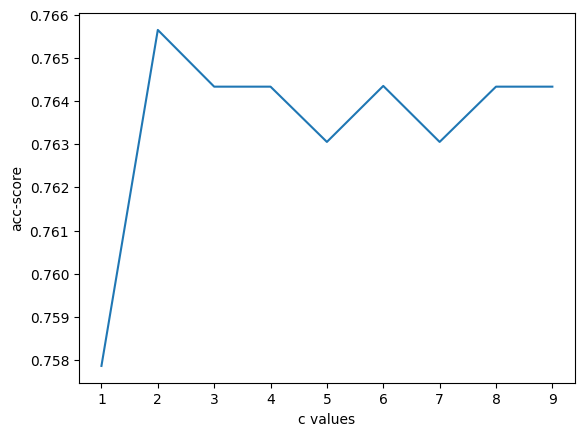

In [13]:
import matplotlib.pyplot as plt
plt.plot(c_range,acc_score)
plt.xlabel('c values')
plt.ylabel('acc-score')
plt.xticks(np.arange(1,10,1))
plt.show()

                                                    optmizing gamma

In [14]:
gamma_values=np.arange(0.02,0.13,0.01)
acc_score=[]
for gamma in gamma_values:
    svc=SVC(C=3,gamma=gamma)
    scores=cross_val_score(svc,x,y,cv=10,scoring='accuracy')
    acc_score.append(scores.mean())

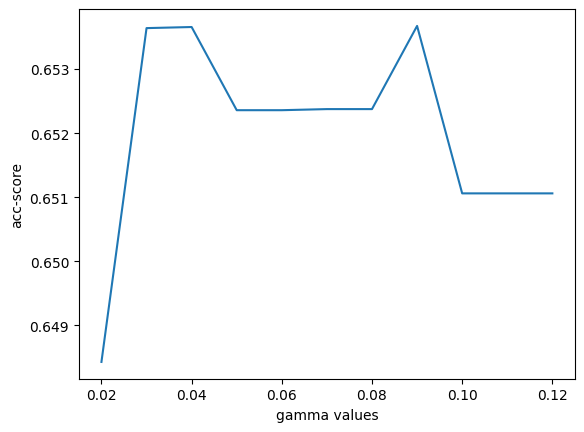

In [15]:
plt.plot(gamma_values,acc_score)
plt.xlabel('gamma values')
plt.ylabel('acc-score')
# plt.xticks(gamma_values)
plt.show()

                                                grid search cv

In [16]:
from sklearn.model_selection import GridSearchCV
param_list={'kernel':['linear','poly','rbf'],
            'C':np.arange(2.9,3.7,0.1),
            'gamma':np.arange(0.03,0.08,0.01),
            'degree':[1,2,3]}

In [17]:
svc=SVC()
svm_model=GridSearchCV(svc,param_grid=param_list,cv=6,scoring='accuracy')
svm_model.fit(x_train,y_train)
print(svm_model.best_params_)
print(svm_model.best_score_)

{'C': 3.2, 'degree': 1, 'gamma': 0.05, 'kernel': 'poly'}
0.7817913573196269


In [18]:
final_svc=SVC(C=3.2,degree=1,gamma=0.05,kernel='poly')
final_svc.fit(x_train,y_train)

SVC(C=3.2, degree=1, gamma=0.05, kernel='poly')

In [19]:
x_train_pred=final_svc.predict(x_train)
y_pred=final_svc.predict(x_test)
print('Training accuracy= ',accuracy_score(y_train,x_train_pred))
print('Test accuracy= ',accuracy_score(y_test,y_pred))

Training accuracy=  0.7899022801302932
Test accuracy=  0.7337662337662337


                                               Making a predictive system

In [20]:
input_data=(8,110,76,0,0,27.8,0.237,58)

#changing data to numpy array
input_data_as_numpy_array=np.asarray(input_data)

#changing shape of array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

#std the data
std_data=scaler.transform(input_data_reshaped)
# std_data
prediction=final_svc.predict(std_data)
# print(prediction)

if(prediction[0]==1):
    print('Positive diabeties')
else:
    print('Negative diabeties')

Negative diabeties


c:\Users\hp\Desktop\code\multiple disease\Multiple-Disease-Prediction\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


                             SAVING THE TRAINED MODEL

In [21]:
import pickle

In [22]:
with open('diabetes.sav','wb') as f:
    pickle.dump(final_svc,f)

In [23]:
with open('diabetes.sav','rb') as f:
    model=pickle.load(f)

In [24]:
with open('scaler_dia.pkl','wb') as f:
    pickle.dump(scaler,f)

In [25]:
with open('scaler_dia.pkl','rb') as f:
    scale_model=pickle.load(f)